# Loading the dataset & Libraries


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv("flight.csv")

In [32]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [33]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Checking Missing Values or Null Values

In [35]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [36]:
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [37]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [38]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [39]:
df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [42]:
df["Additional_Info"].unique

<bound method Series.unique of 0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object>

In [43]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Visualizations

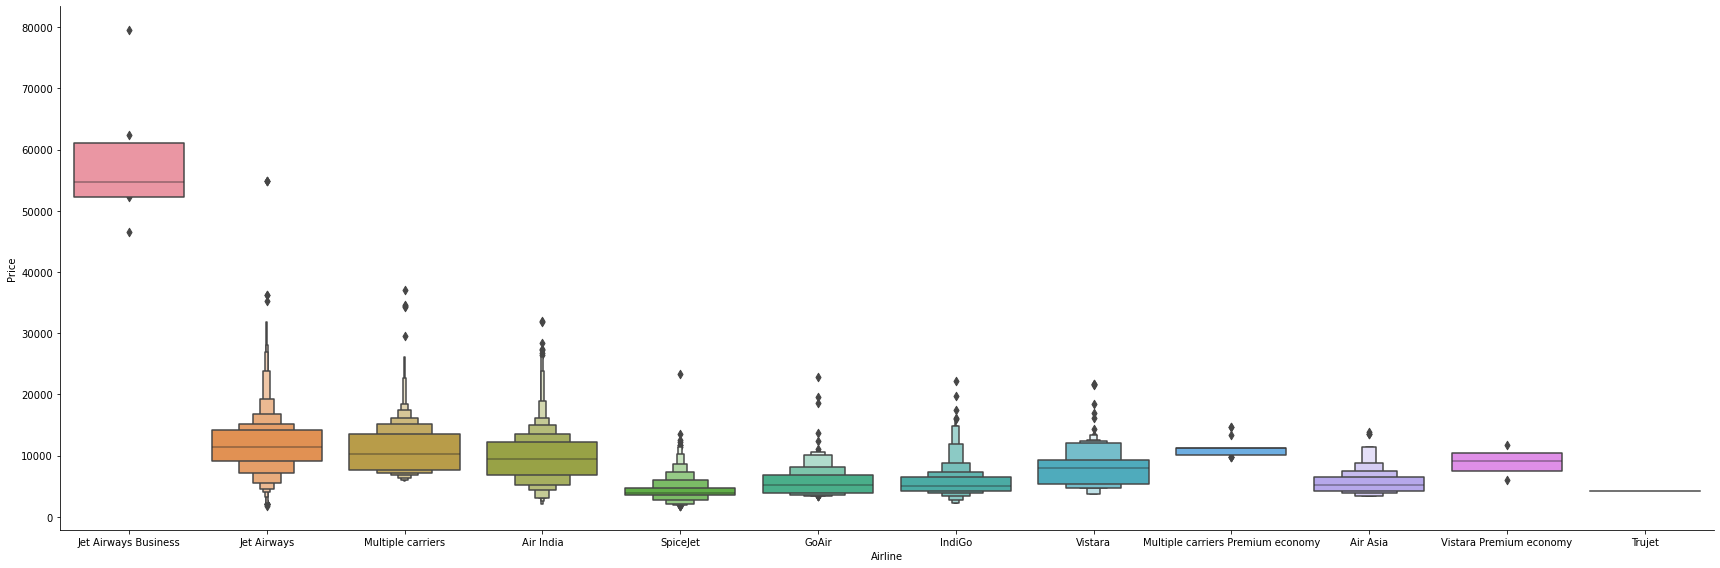

In [44]:
sns.catplot(y = "Price", x = "Airline", data=df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

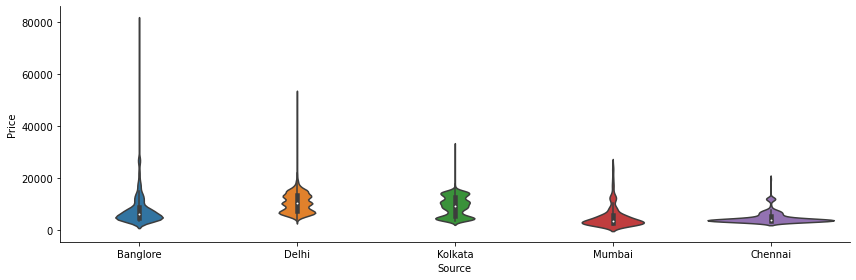

In [45]:
sns.catplot(y = "Price", x = "Source", data=df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

In [46]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [47]:
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Journey_month"] =df['Date_of_Journey'].str.split('/').str[1].astype(int)
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [48]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [49]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [50]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


Text(0, 0.5, 'Count of flights')

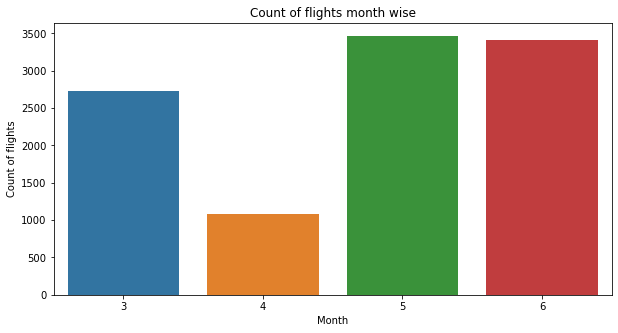

In [51]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

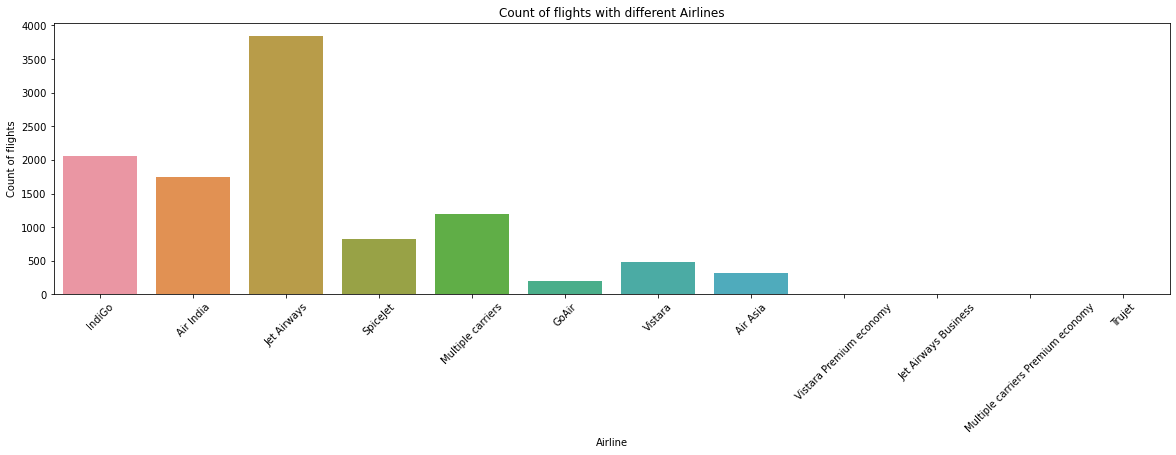

In [52]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data=df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

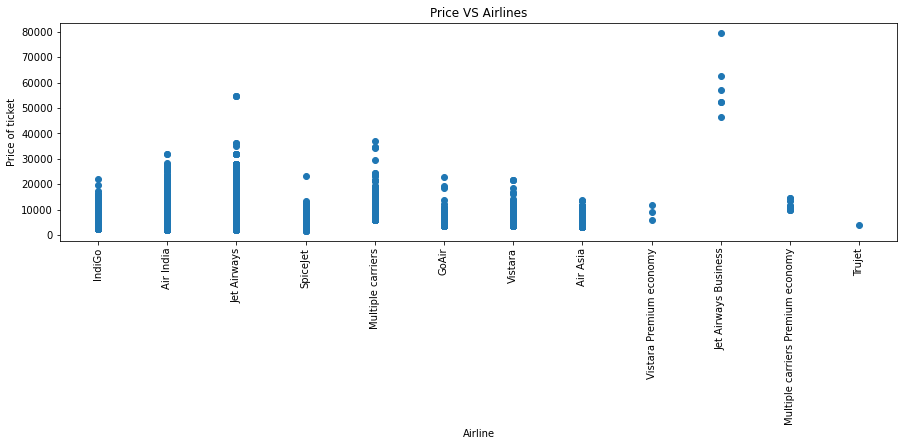

In [53]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'],df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

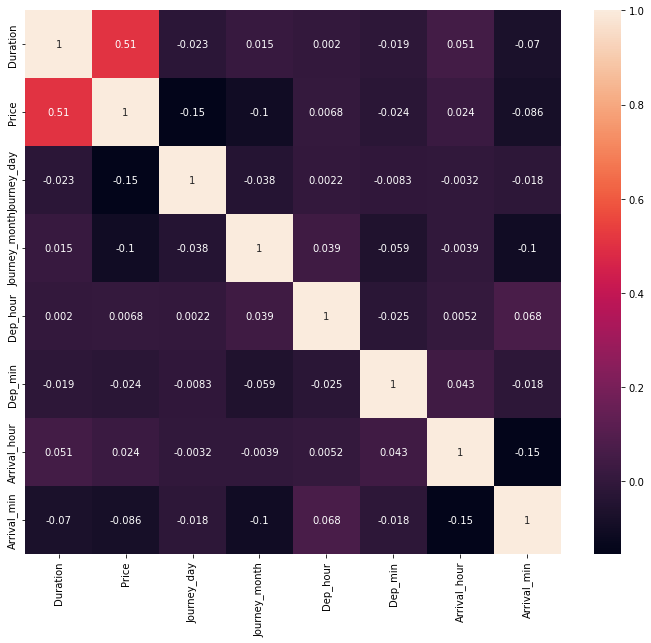

In [54]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [55]:
df= df.drop(['Additional_Info'],axis = 1)
df= df.drop(['Route'],axis = 1)


# Label Encoding

In [56]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Airline']= label_encoder.fit_transform(df['Airline'])
df['Source']= label_encoder.fit_transform(df['Source'])
df['Destination']= label_encoder.fit_transform(df['Destination'])
df['Total_Stops']= label_encoder.fit_transform(df['Total_Stops'])


In [57]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,170,4,3897,24,3,22,20,1,10
1,1,3,0,445,1,7662,1,5,5,50,13,15
2,4,2,1,1140,1,13882,9,6,9,25,4,25
3,3,3,0,325,0,6218,12,5,18,5,23,30
4,3,0,5,285,0,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,4,4107,9,4,19,55,22,25
10679,1,3,0,155,4,4145,27,4,20,45,23,20
10680,4,0,2,180,4,7229,27,4,8,20,11,20
10681,10,0,5,160,4,12648,1,3,11,30,14,10


# Checking Skewness

In [58]:
df.skew()

Airline          0.731095
Source          -0.424054
Destination      1.244169
Duration         0.861074
Total_Stops      0.631681
Price            1.812552
Journey_day      0.118351
Journey_month   -0.387493
Dep_hour         0.113073
Dep_min          0.167029
Arrival_hour    -0.369988
Arrival_min      0.110945
dtype: float64

In [59]:
skew=('Airline','Destination','Duration','Price','Total_Stops')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

# Removing Outliers

In [60]:
from scipy.stats import zscore

In [61]:
z=np.abs(zscore(df))
print(z)

        Airline    Source  Destination  Duration  Total_Stops     Price  \
0      0.173359  1.658441     1.897504  1.061980     1.353931  1.404199   
1      1.484192  0.890052     1.300469  0.003924     0.088179  0.087883   
2      0.248636  0.040555     0.063324  1.032815     0.088179  1.069373   
3      0.173359  0.890052     1.300469  0.349844     0.869325  0.494486   
4      0.173359  1.658441     1.897504  0.494322     0.869325  0.986268   
...         ...       ...          ...       ...          ...       ...   
10678  2.795026  0.890052     1.300469  1.199260     1.353931  1.302014   
10679  1.484192  0.890052     1.300469  1.163307     1.353931  1.284083   
10680  0.248636  1.658441     0.660359  0.999253     1.353931  0.201152   
10681  1.739714  1.658441     1.897504  1.128487     1.353931  0.888097   
10682  1.484192  0.040555     0.063324  0.124420     0.088179  0.745189   

       Journey_day  Journey_month  Dep_hour   Dep_min  Arrival_hour  \
0         1.237383       1.4

In [62]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 10682, 10682, 10682], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(10683, 12)


In [63]:
df_new=df[(z<3).all(axis=1)]

In [64]:
print(df.shape)
print(df_new.shape)
df=df_new
print('Shape after removing outliers',df.shape)

(10683, 12)
(10673, 12)
Shape after removing outliers (10673, 12)


# Correlation

<AxesSubplot:>

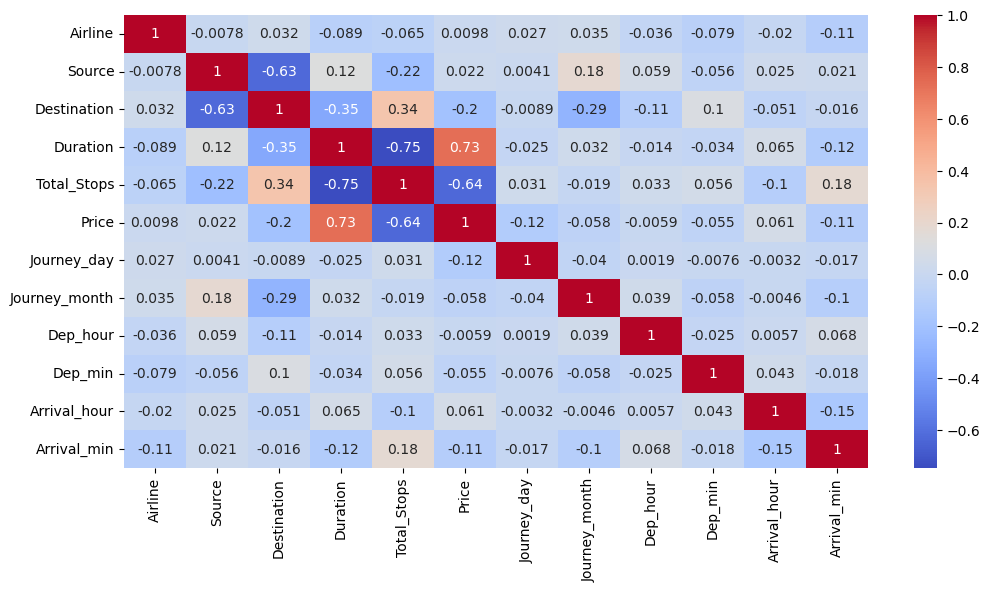

In [65]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

# Model Buliding & Evaluation

In [66]:
x=df.drop(['Price'],axis = 1)
y=df['Price']

In [67]:
x

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,1.386294,0,1.791759,5.141664,1.609438,24,3,22,20,1,10
1,0.693147,3,0.000000,6.100319,0.693147,1,5,5,50,13,15
2,1.609438,2,0.693147,7.039660,0.693147,9,6,9,25,4,25
3,1.386294,3,0.000000,5.786897,0.000000,12,5,18,5,23,30
4,1.386294,0,1.791759,5.655992,0.000000,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,3,0.000000,5.017280,1.609438,9,4,19,55,22,25
10679,0.693147,3,0.000000,5.049856,1.609438,27,4,20,45,23,20
10680,1.609438,0,1.098612,5.198497,1.609438,27,4,8,20,11,20
10681,2.397895,0,1.791759,5.081404,1.609438,1,3,11,30,14,10


In [68]:
y

0        8.268219
1        8.944159
2        9.538420
3        8.735364
4        9.495745
           ...   
10678    8.320692
10679    8.329899
10680    8.885994
10681    9.445333
10682    9.371949
Name: Price, Length: 10673, dtype: float64

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [74]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [75]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        r2_sc=r2_score(test_y,pre)
        print("R2 score correspond to random state",r_state,"is",r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
            
print()
print()
print()
print()

print("max R2 score correspond to random state",final_state,"is",max_r2_score,"and model is",final_model)


R2 score correspond to random state 40 is 0.7876198653306331
R2 score correspond to random state 40 is 0.6423097544209786
R2 score correspond to random state 40 is 0.6966869084022335
R2 score correspond to random state 40 is 0.5761282487537689
R2 score correspond to random state 40 is 0.8369007725254753
R2 score correspond to random state 41 is 0.7774345851664163
R2 score correspond to random state 41 is 0.6453848262610111
R2 score correspond to random state 41 is 0.6879050540232101
R2 score correspond to random state 41 is 0.5689981669459938
R2 score correspond to random state 41 is 0.8238967315024243
R2 score correspond to random state 42 is 0.7831819856116613
R2 score correspond to random state 42 is 0.6504051259414733
R2 score correspond to random state 42 is 0.6966074858002116
R2 score correspond to random state 42 is 0.5950831347280188
R2 score correspond to random state 42 is 0.8351150972317645
R2 score correspond to random state 43 is 0.7915406820306474
R2 score correspond to r

In [76]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [77]:
y_pred=GBR.predict(x_test)
y_pred

array([9.25908541, 9.38775826, 9.43614865, ..., 9.05477806, 8.61472576,
       9.50795567])

In [78]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 83.08


In [79]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [80]:
pred_df

,Actual Value,Predicted Value,Difference
296,8.966101,9.259085,-0.292985
7628,9.464905,9.387758,0.077147
3151,9.475010,9.436149,0.038861
9461,8.188133,8.248614,-0.060480
2252,9.685332,9.388232,0.297100
...,...,...,...
3069,8.740977,8.881006,-0.140029
508,9.142704,9.120248,0.022456
5979,9.032051,9.054778,-0.022727
2038,9.055790,8.614726,0.441064


# CROSS VALIDATION

In [81]:
pred_test=GBR.predict(x_test)

In [83]:
pred_train=GBR.predict(x_train)

In [85]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(GBR,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for  testing is {Test_accuracy}")
    print("\n") 

At cross fold 2 the cv score is 0.8348975535285362 and accuracy score for training is 0.8420938187967781 and accuracy for  testing is 0.8307814486722787


At cross fold 3 the cv score is 0.8345165332521135 and accuracy score for training is 0.8420938187967781 and accuracy for  testing is 0.8307814486722787


At cross fold 4 the cv score is 0.8353186133278943 and accuracy score for training is 0.8420938187967781 and accuracy for  testing is 0.8307814486722787


At cross fold 5 the cv score is 0.8359699114105466 and accuracy score for training is 0.8420938187967781 and accuracy for  testing is 0.8307814486722787


At cross fold 6 the cv score is 0.8346014687428314 and accuracy score for training is 0.8420938187967781 and accuracy for  testing is 0.8307814486722787


At cross fold 7 the cv score is 0.8355441054877019 and accuracy score for training is 0.8420938187967781 and accuracy for  testing is 0.8307814486722787


At cross fold 8 the cv score is 0.8354876159894603 and accuracy score 

# Saving the Model

In [86]:
import pickle 
filename="flight.pkl"
pickle.dump(GBR,open(filename,'wb'))

In [87]:
loaded_model=pickle.load(open('flight.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8307814486722787


# Conclusion

In [89]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [90]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134
Predicted,9.259085,9.387758,9.436149,8.248614,9.388232,8.773807,9.572497,9.616618,9.356838,9.212471,...,8.403595,8.279039,8.263953,9.21745,8.855642,8.881006,9.120248,9.054778,8.614726,9.507956
Original,8.966101,9.464905,9.475010,8.188133,9.685332,8.724695,9.624831,9.924123,9.542661,9.278373,...,8.279951,8.195885,8.253748,9.36982,9.165866,8.740977,9.142704,9.032051,9.055790,9.319284
